In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math 

In [2]:
PVS_1_gps_mpu_left_df = pd.read_csv("PVS 1\dataset_gps_mpu_left.csv")
PVS_1_gps_mpu_right_df = pd.read_csv("PVS 1\dataset_gps_mpu_right.csv")
PVS_1_gps_df = pd.read_csv("PVS 1\dataset_gps.csv")

PVS_1_gps_mpu_left_df.head()
PVS_1_gps_mpu_right_df.head()
PVS_1_gps_df.head()

PVS_1_gps_mpu_left_df = pd.concat([PVS_1_gps_mpu_left_df,PVS_1_gps_df['distance_meters']], axis=1)

In [3]:
#gps_update = PVS_1_gps_mpu_left_df['dis_gps'].loc[PVS_1_gps_mpu_left_df['dis_gps'] != 0]

In [4]:
def lat_long_to_x_y(df):
    R = 6378.137

    x_initial = R * np.deg2rad(df['longitude'][0]) * math.cos(np.deg2rad(df['latitude'][0])) 
    y_initial = R * np.deg2rad(df['latitude'][0])

    print(x_initial)
    print(y_initial)

    df['pos_x_gps_projection'] = R * np.deg2rad(df['longitude']) * np.cos(np.deg2rad(df['latitude']))*1000
    df['pos_y_gps_projection'] = R * np.deg2rad(df['latitude'])*1000

    df['pos_x_gps_projection_set_zero'] = (R * np.deg2rad(df['longitude']) * np.cos(np.deg2rad(df['latitude'])) - x_initial)*1000
    df['pos_y_gps_projection_set_zero'] = (R * np.deg2rad(df['latitude']) - y_initial)*1000

In [5]:
lat_long_to_x_y(PVS_1_gps_mpu_left_df)

-5035.560676897081
-3085.5359412212756


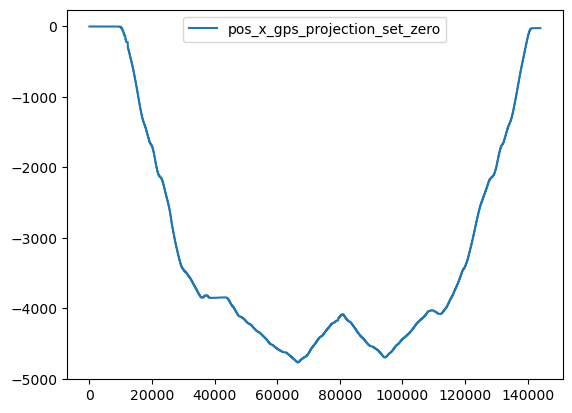

<Figure size 50000x100000 with 0 Axes>

In [6]:
PVS_1_gps_mpu_left_df.plot(y=['pos_x_gps_projection_set_zero'])
plt.figure(figsize=(500,1000))
plt.show()

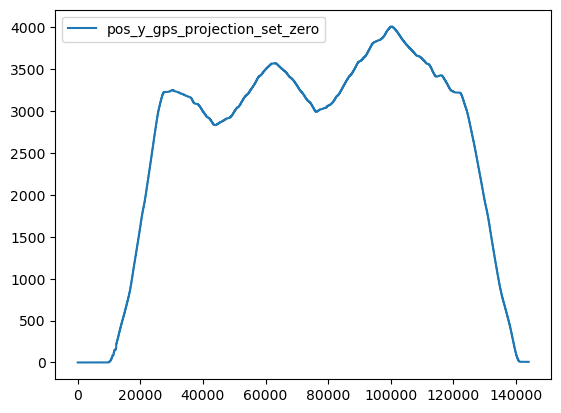

<Figure size 50000x100000 with 0 Axes>

In [7]:
PVS_1_gps_mpu_left_df.plot(y=['pos_y_gps_projection_set_zero'])
plt.figure(figsize=(500,1000))
plt.show()

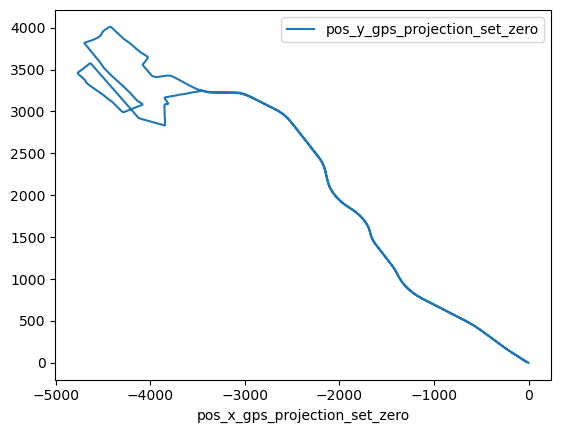

<Figure size 50000x100000 with 0 Axes>

In [8]:
PVS_1_gps_mpu_left_df.plot(x='pos_x_gps_projection_set_zero',y='pos_y_gps_projection_set_zero')
plt.figure(figsize=(500,1000))
plt.show()

In [9]:
def measure(lat1, lon1, lat2, lon2):  #generally used geo measurement function
    R = 6378.137 #Radius of earth in KM
    dLat = lat2 * np.pi / 180 - lat1 * np.pi / 180
    dLon = lon2 * np.pi / 180 - lon1 * np.pi / 180
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(lat1 * np.pi / 180) * np.cos(lat2 * np.pi / 180) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d * 1000; #meters

In [10]:
PVS_1_gps_mpu_left_df['latitude_shifted'] = PVS_1_gps_mpu_left_df['latitude'].shift()
PVS_1_gps_mpu_left_df['longitude_shifted'] = PVS_1_gps_mpu_left_df['longitude'].shift()

PVS_1_gps_mpu_left_df['dis_gps'] = measure(PVS_1_gps_mpu_left_df['latitude'], PVS_1_gps_mpu_left_df['longitude'], PVS_1_gps_mpu_left_df['latitude_shifted'], PVS_1_gps_mpu_left_df['longitude_shifted'])

PVS_1_gps_mpu_left_df = PVS_1_gps_mpu_left_df.fillna(0)

In [11]:
gps_update_index_ls = []

gps_update = PVS_1_gps_mpu_left_df['dis_gps'].loc[PVS_1_gps_mpu_left_df['dis_gps'] != 0]

gps_update_index_ls = list(gps_update.index)

gps_update_index_ls.insert(0, 0)

gps_update_point_between_ls = []

for i in range(len(gps_update_index_ls)):
    if i != len(gps_update_index_ls) - 1:
        gps_update_point_between_ls.append(gps_update_index_ls[i+1] - gps_update_index_ls[i])

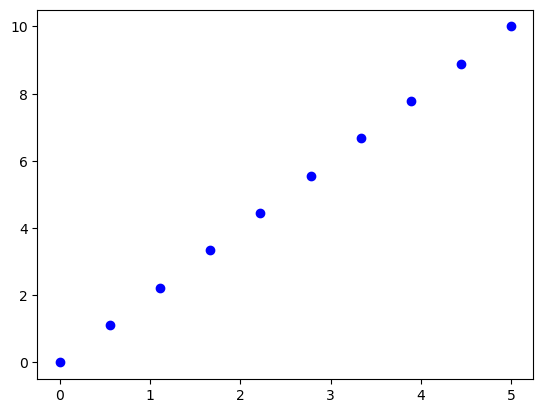

In [12]:
def lerp(start, end, t):
    """
    Linear interpolation function.
    """
    return (1 - t) * start + t * end

def generate_points_on_line(start_point_x, start_point_y, end_point_x, end_point_y, num_points):
    """
    Generate points along a line segment.
    """
    x = []
    y = []
    for i in range(num_points):
        t = i / (num_points - 1)  # t ranges from 0 to 1
        x.append(lerp(start_point_x, end_point_x, t))
        y.append(lerp(start_point_y, end_point_y, t))
    return x, y

# Example usage
start_point_x = 0
start_point_y = 0
end_point_x = 5
end_point_y = 10
num_points = 10

x, y = generate_points_on_line(start_point_x, start_point_y, end_point_x, end_point_y, num_points)

plt.plot(x,y,'bo')
plt.show()



C:\Users\tucha\AppData\Local\Temp\ipykernel_58968\2763599742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = x
C:\Users\tucha\AppData\Local\Temp\ipykernel_58968\2763599742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = y


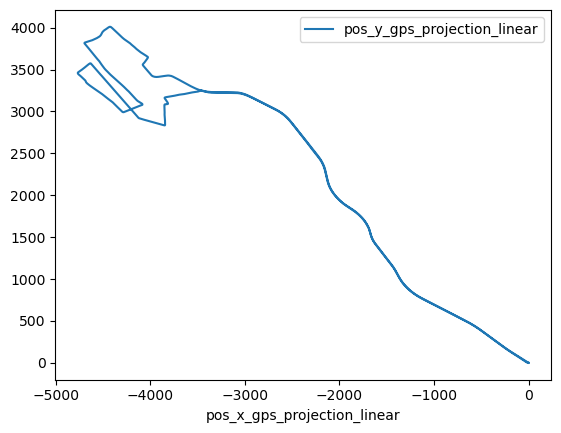

<Figure size 50000x100000 with 0 Axes>

In [13]:
PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'] = 0
PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'] = 0

for i in range(len(gps_update_index_ls)):

#     # m = (PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i]) / (PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i])
#     # c = PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] * m

    if i != len(gps_update_index_ls)-1: #out of range
        x, y = generate_points_on_line(PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i+1]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i+1]], gps_update_point_between_ls[i])
        PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = x
        PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = y
    
PVS_1_gps_mpu_left_df.plot(x='pos_x_gps_projection_linear',y='pos_y_gps_projection_linear')
plt.figure(figsize=(500,1000))
plt.show()

C:\Users\tucha\AppData\Local\Temp\ipykernel_48404\1207142385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'][gps_update_index_ls[i] + j] = x[j]
C:\Users\tucha\AppData\Local\Temp\ipykernel_48404\1207142385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'][gps_update_index_ls[i] + j] = y[j]


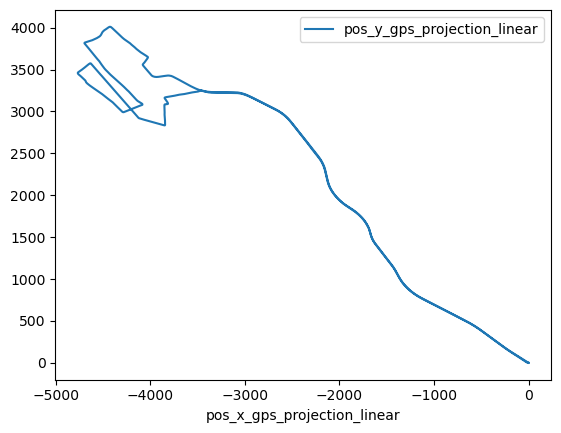

<Figure size 50000x100000 with 0 Axes>

In [20]:
# PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'] = 0
# PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'] = 0

# for i in range(len(gps_update_index_ls)):

    # m = (PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i]) / (PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i])
    # c = PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] * m

#     if i != len(gps_update_index_ls)-1: #out of range
#         x, y = generate_points_on_line(PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i+1]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i+1]], gps_update_point_between_ls[i])
        
#         for j in range(gps_update_point_between_ls[i]):
#             PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'][gps_update_index_ls[i] + j] = x[j]
#             PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'][gps_update_index_ls[i] + j] = y[j]
    
# PVS_1_gps_mpu_left_df.plot(x='pos_x_gps_projection_linear',y='pos_y_gps_projection_linear')
# plt.figure(figsize=(500,1000))
# plt.show()

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

model = MLPRegressor(hidden_layer_sizes=(32, 32, 32), #Hidden1 มี 3 นิวรอน และ Hidden2 มี 3 นิวรอน
                      activation='relu',
                      solver='lbfgs',
                      max_iter=40000,
                      random_state=0)

In [36]:
#print(PVS_1_gps_mpu_left_df.columns) #All column
selected_train_column = ['timestamp', 'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard',
       'acc_x_above_suspension', 'acc_y_above_suspension',
       'acc_z_above_suspension', 'acc_x_below_suspension',
       'acc_y_below_suspension', 'acc_z_below_suspension', 'gyro_x_dashboard',
       'gyro_y_dashboard', 'gyro_z_dashboard', 'gyro_x_above_suspension',
       'gyro_y_above_suspension', 'gyro_z_above_suspension',
       'gyro_x_below_suspension', 'gyro_y_below_suspension',
       'gyro_z_below_suspension', 'mag_x_dashboard', 'mag_y_dashboard',
       'mag_z_dashboard', 'mag_x_above_suspension', 'mag_y_above_suspension',
       'mag_z_above_suspension', 'timestamp_gps'
       ]

selected_test_column = ['latitude', 'longitude', 'speed']


In [37]:
PVS_1_gps_mpu_left_df_train = PVS_1_gps_mpu_left_df[selected_train_column]

PVS_1_gps_mpu_left_df_test = PVS_1_gps_mpu_left_df[selected_test_column]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(PVS_1_gps_mpu_left_df_train, PVS_1_gps_mpu_left_df_test, test_size=0.2, random_state=42)

In [39]:
model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(32, 32, 32), max_iter=40000, random_state=0,
             solver='lbfgs')

In [40]:
x_train_predict = model.predict(x_train)